In [124]:
import pandas as pd
pd.options.display.max_colwidth = None

In [125]:
df = pd.read_excel('../datasets/answers.xlsx')
df.shape

(200, 72)

In [126]:
df.sample(frac=0.1)

,Carimbo de data/hora,Endereço de e-mail,1. Nome (identificação opcional),2. Faixa Etária,3. Gênero,4. Quantidade de filhos (as),"5. Indique a idade de seus (suas) filhos (as), separados por vírgula.",6. Estado civil,7. Renda familiar mensal,8. Cor ou raça,...,"Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [25. Pedir ajuda, quando necessário, aos colegas nas atividades do curso?]","Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [26. Trabalhar em grupo?]","Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [27. Cooperar com os colegas nas atividades do curso?]","Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [28. Estabelecer bom relacionamento com meus professores?]","Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [29. Perguntar quando tenho dúvida?]","Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [30. Estabelecer amizades com os colegas do curso?]","Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [31. Esforçar-me nas atividades acadêmicas?]","Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [32. Motivar-me para fazer as atividades ligadas ao curso?]","Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [33. Terminar trabalhos do curso dentro do prazo estabelecido?]","Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar 

# Pre-processing the dataset
---

In [127]:
# Dropping some columns
df_new = df.drop(columns=['Carimbo de data/hora', 'Endereço de e-mail', '1. Nome (identificação opcional)',
                          '5. Indique a idade de seus (suas) filhos (as), separados por vírgula. ',
                          '9. Quantas pessoas residem com você?',
                          '11. Universidade que está vinculado enquanto estudante',
                          '12. Programa em que está cursando Mestrado ou Doutorado ',
                          '13. É beneficiário de bolsa de pesquisa?',
                          'Li e concordo com o termo de consentimento livre e esclarecido.'])
df_new.head()

,2. Faixa Etária,3. Gênero,4. Quantidade de filhos (as),6. Estado civil,7. Renda familiar mensal,8. Cor ou raça,10. Assinale seu nível de formação,14. Número de publicações (considerar apenas as publicações em periódicos qualificados),15. Qual sua área de formação?,"Para cada questão, favor assinalar o número que mais se aproxima da verdade para você. É melhor que responda com a primeira alternativa que lhe ocorra e evite pensar demais em qual seria a melhor alternativa. [1. Tenho medo dos outros me avaliarem e, se possível, evito avaliações.]",...,"Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [25. Pedir ajuda, quando necessário, aos colegas nas atividades do curso?]","Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [26. Trabalhar em grupo?]","Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [27. Cooperar com os colegas nas atividades do curso?]","Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [28. Estabelecer bom relacionamento com meus professores?]","Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [29. Perguntar quando tenho dúvida?]","Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [30. Estabelecer amizades com os colegas do curso?]","Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [31. Esforçar-me nas atividades acadêmicas?]","Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [32. Motivar-me para fazer as atividades ligadas ao curso?]","Para cada questão, assinale o número que melhor indica seu grau de capacidade diante de cada situação. Nessa escala de avaliação, o ponto zero indica que você se julga pouco capaz e o ponto 10 indica que você se julga muito capaz (IMPORTANTE: para visualizar todos os pontos da escala, utilize a barra de rolagem abaixo da escala). [33. Terminar trabalhos do curs

In [128]:
columns = ['faixa_etaria', 'genero', 'qt_filhos', 'estado_civil', 'renda_familar_mensal', 'cor_raca', 'formacao', 'qt_publicacoes', 'area_formacao',
           'clance_1', 'clance_2', 'clance_3', 'clance_4', 'clance_5', 'clance_6', 'clance_7',
           'clance_8', 'clance_9', 'clance_10', 'clance_11', 'clance_12', 'clance_13', 'clance_14',
           'clance_15', 'clance_16', 'clance_17', 'clance_18', 'clance_19', 'clance_20',
           'auto_eficacia_1', 'auto_eficacia_2', 'auto_eficacia_3', 'auto_eficacia_4', 'auto_eficacia_5',
           'auto_eficacia_6', 'auto_eficacia_7', 'auto_eficacia_8', 'auto_eficacia_9', 'auto_eficacia_10',
           'auto_eficacia_11', 'auto_eficacia_12', 'auto_eficacia_13', 'auto_eficacia_14', 'auto_eficacia_15',
           'auto_eficacia_16', 'auto_eficacia_17', 'auto_eficacia_18', 'auto_eficacia_19', 'auto_eficacia_20',
           'auto_eficacia_21', 'auto_eficacia_22', 'auto_eficacia_23', 'auto_eficacia_24', 'auto_eficacia_25',
           'auto_eficacia_26', 'auto_eficacia_27', 'auto_eficacia_28', 'auto_eficacia_29', 'auto_eficacia_30',
           'auto_eficacia_31', 'auto_eficacia_32', 'auto_eficacia_33', 'auto_eficacia_34' ]

df_new.columns = columns
df_new.head()

,faixa_etaria,genero,qt_filhos,estado_civil,renda_familar_mensal,cor_raca,formacao,qt_publicacoes,area_formacao,clance_1,...,auto_eficacia_25,auto_eficacia_26,auto_eficacia_27,auto_eficacia_28,auto_eficacia_29,auto_eficacia_30,auto_eficacia_31,auto_eficacia_32,auto_eficacia_33,auto_eficacia_34
0,31-40,Feminino,3,Casado,"Acima de R$9.000,00",Branca,Doutorado,De 4 a 6,Pedagogia,Ás vezes,...,10,10,10,10,10,10,10,10,10,10
1,20-30,Feminino,Nenhum,Solteiro,"De R$1.500,00 a R$3.000,00",Branca,Doutorado,De 1 a 3,Sociologia e Antropologia,Ás vezes,...,8,9,8,9,9,10,10,10,10,10
2,20-30,Feminino,Nenhum,Solteiro,"De R$1.500,00 a R$3.000,00",Branca,Mestrado,De 1 a 3,Licenciatura em química,Raramente,...,10,10,10,10,10,10,10,10,10,10
3,20-30,Masculino,Nenhum,Solteiro,"Até R$1.500,00",Branca,Mestrado,Nenhuma,Psicologia,Muito verdadeiro,...,9,9,9,7,5,8,7,2,9,7
4,20-30,Feminino,Nenhum,Casado,"De R$6.000,00 a R$9.000,00",Branca,Doutorado,De 1 a 3,Psicologia,Ás vezes,...,10,7,10,10,10,10,10,10,9,10


# Data transformation
---

### Column 'faixa-etaria'

In [129]:
# Getting unique values
df_new.groupby('faixa_etaria')['faixa_etaria'].count()

faixa_etaria
20-30    104
31-40     67
41-50     19
51-60     10
Name: faixa_etaria, dtype: int64

In [130]:
def age_transformation(val) -> int:
    if val == '20-30':
        return -30
    if val == '31-40':
        return -40
    if val == '41-50':
        return -50
    if val == '51-60':
        return -60

In [131]:
df_new['faixa_etaria'] = df_new['faixa_etaria'].apply(age_transformation)
df_new.head()

,faixa_etaria,genero,qt_filhos,estado_civil,renda_familar_mensal,cor_raca,formacao,qt_publicacoes,area_formacao,clance_1,...,auto_eficacia_25,auto_eficacia_26,auto_eficacia_27,auto_eficacia_28,auto_eficacia_29,auto_eficacia_30,auto_eficacia_31,auto_eficacia_32,auto_eficacia_33,auto_eficacia_34
0,-40,Feminino,3,Casado,"Acima de R$9.000,00",Branca,Doutorado,De 4 a 6,Pedagogia,Ás vezes,...,10,10,10,10,10,10,10,10,10,10
1,-30,Feminino,Nenhum,Solteiro,"De R$1.500,00 a R$3.000,00",Branca,Doutorado,De 1 a 3,Sociologia e Antropologia,Ás vezes,...,8,9,8,9,9,10,10,10,10,10
2,-30,Feminino,Nenhum,Solteiro,"De R$1.500,00 a R$3.000,00",Branca,Mestrado,De 1 a 3,Licenciatura em química,Raramente,...,10,10,10,10,10,10,10,10,10,10
3,-30,Masculino,Nenhum,Solteiro,"Até R$1.500,00",Branca,Mestrado,Nenhuma,Psicologia,Muito verdadeiro,...,9,9,9,7,5,8,7,2,9,7
4,-30,Feminino,Nenhum,Casado,"De R$6.000,00 a R$9.000,00",Branca,Doutorado,De 1 a 3,Psicologia,Ás vezes,...,10,7,10,10,10,10,10,10,9,10


### Column 'qt_filhos'

In [132]:
df_new['qt_filhos'].unique()

array([3, 'Nenhum', 2, 1], dtype=object)

In [133]:
df_new.loc[df_new.qt_filhos == 'Nenhum', 'qt_filhos'] = 0
df_new.head()

,faixa_etaria,genero,qt_filhos,estado_civil,renda_familar_mensal,cor_raca,formacao,qt_publicacoes,area_formacao,clance_1,...,auto_eficacia_25,auto_eficacia_26,auto_eficacia_27,auto_eficacia_28,auto_eficacia_29,auto_eficacia_30,auto_eficacia_31,auto_eficacia_32,auto_eficacia_33,auto_eficacia_34
0,-40,Feminino,3,Casado,"Acima de R$9.000,00",Branca,Doutorado,De 4 a 6,Pedagogia,Ás vezes,...,10,10,10,10,10,10,10,10,10,10
1,-30,Feminino,0,Solteiro,"De R$1.500,00 a R$3.000,00",Branca,Doutorado,De 1 a 3,Sociologia e Antropologia,Ás vezes,...,8,9,8,9,9,10,10,10,10,10
2,-30,Feminino,0,Solteiro,"De R$1.500,00 a R$3.000,00",Branca,Mestrado,De 1 a 3,Licenciatura em química,Raramente,...,10,10,10,10,10,10,10,10,10,10
3,-30,Masculino,0,Solteiro,"Até R$1.500,00",Branca,Mestrado,Nenhuma,Psicologia,Muito verdadeiro,...,9,9,9,7,5,8,7,2,9,7
4,-30,Feminino,0,Casado,"De R$6.000,00 a R$9.000,00",Branca,Doutorado,De 1 a 3,Psicologia,Ás vezes,...,10,7,10,10,10,10,10,10,9,10


### Column 'renda-familiar-mensal'

In [134]:
# Getting unique values
df_new['renda_familar_mensal'].unique()

array(['Acima de R$9.000,00', 'De R$1.500,00 a R$3.000,00',
       'Até R$1.500,00', 'De R$6.000,00 a R$9.000,00',
       'De R$3.000,00 a R$6.000,00'], dtype=object)

In [135]:
def incoming_transformatino(val) -> int:
    if val == 'Acima de R$9.000,00':
        return +9000
    if val == 'De R$6.000,00 a R$9.000,00':
        return -9000
    if val == 'De R$3.000,00 a R$6.000,00':
        return -6000
    if val == 'De R$1.500,00 a R$3.000,00':
        return -3000
    if val == 'Até R$1.500,00':
        return -1500

In [136]:
df_new['renda_familar_mensal'] = df_new['renda_familar_mensal'].apply(incoming_transformatino)
df_new.head()

,faixa_etaria,genero,qt_filhos,estado_civil,renda_familar_mensal,cor_raca,formacao,qt_publicacoes,area_formacao,clance_1,...,auto_eficacia_25,auto_eficacia_26,auto_eficacia_27,auto_eficacia_28,auto_eficacia_29,auto_eficacia_30,auto_eficacia_31,auto_eficacia_32,auto_eficacia_33,auto_eficacia_34
0,-40,Feminino,3,Casado,9000,Branca,Doutorado,De 4 a 6,Pedagogia,Ás vezes,...,10,10,10,10,10,10,10,10,10,10
1,-30,Feminino,0,Solteiro,-3000,Branca,Doutorado,De 1 a 3,Sociologia e Antropologia,Ás vezes,...,8,9,8,9,9,10,10,10,10,10
2,-30,Feminino,0,Solteiro,-3000,Branca,Mestrado,De 1 a 3,Licenciatura em química,Raramente,...,10,10,10,10,10,10,10,10,10,10
3,-30,Masculino,0,Solteiro,-1500,Branca,Mestrado,Nenhuma,Psicologia,Muito verdadeiro,...,9,9,9,7,5,8,7,2,9,7
4,-30,Feminino,0,Casado,-9000,Branca,Doutorado,De 1 a 3,Psicologia,Ás vezes,...,10,7,10,10,10,10,10,10,9,10


### Column 'qt_publicacoes'

In [137]:
df_new['qt_publicacoes'].unique()

array(['De 4 a 6', 'De 1 a 3', 'Nenhuma', 'De 10 a 15', 'De 7 a 9', nan,
       'De 21 a 30', 'mais de 30', 'De 16 a 20'], dtype=object)

In [138]:
def ammount_publishing_transformation(val) -> int:
    if val == 'mais de 30':
        return +30
    if val == 'De 21 a 30':
        return -30
    if val == 'De 16 a 20':
        return -20
    if val == 'De 10 a 15':
        return -15
    if val == 'De 7 a 9':
        return -9
    if val == 'De 4 a 6':
        return -6
    if val == 'De 1 a 3':
        return -3

    return 0

In [139]:
df_new['qt_publicacoes'] = df_new['qt_publicacoes'].apply(ammount_publishing_transformation)
df_new.head()

,faixa_etaria,genero,qt_filhos,estado_civil,renda_familar_mensal,cor_raca,formacao,qt_publicacoes,area_formacao,clance_1,...,auto_eficacia_25,auto_eficacia_26,auto_eficacia_27,auto_eficacia_28,auto_eficacia_29,auto_eficacia_30,auto_eficacia_31,auto_eficacia_32,auto_eficacia_33,auto_eficacia_34
0,-40,Feminino,3,Casado,9000,Branca,Doutorado,-6,Pedagogia,Ás vezes,...,10,10,10,10,10,10,10,10,10,10
1,-30,Feminino,0,Solteiro,-3000,Branca,Doutorado,-3,Sociologia e Antropologia,Ás vezes,...,8,9,8,9,9,10,10,10,10,10
2,-30,Feminino,0,Solteiro,-3000,Branca,Mestrado,-3,Licenciatura em química,Raramente,...,10,10,10,10,10,10,10,10,10,10
3,-30,Masculino,0,Solteiro,-1500,Branca,Mestrado,0,Psicologia,Muito verdadeiro,...,9,9,9,7,5,8,7,2,9,7
4,-30,Feminino,0,Casado,-9000,Branca,Doutorado,-3,Psicologia,Ás vezes,...,10,7,10,10,10,10,10,10,9,10


### Columns 'clance'

In [140]:
df_new['clance_1'].unique()

array(['Ás vezes', 'Raramente', 'Muito verdadeiro',
       'Não é de todo verdade', 'Frequentemente'], dtype=object)

In [141]:
def clance_transformation_series(series: pd.Series):
    return series.apply(clance_transformation)

def clance_transformation(val) -> int:
    if val == 'Não é de todo verdade':
        return 1
    if val == 'Raramente':
        return 2
    if val == 'Ás vezes':
        return 3
    if val == 'Frequentemente':
        return 4
    if val == 'Muito verdadeiro':
        return 5

    return 0

In [142]:
mask = ['clance_1', 'clance_2', 'clance_3', 'clance_4', 'clance_5', 'clance_6', 'clance_7', 'clance_8', 'clance_9', 'clance_10', 'clance_11', 'clance_12', 'clance_13', 'clance_14','clance_15', 'clance_16', 'clance_17', 'clance_18', 'clance_19', 'clance_20']
df_new[mask] = df_new[mask].apply(clance_transformation_series)
df_new.head()

,faixa_etaria,genero,qt_filhos,estado_civil,renda_familar_mensal,cor_raca,formacao,qt_publicacoes,area_formacao,clance_1,...,auto_eficacia_25,auto_eficacia_26,auto_eficacia_27,auto_eficacia_28,auto_eficacia_29,auto_eficacia_30,auto_eficacia_31,auto_eficacia_32,auto_eficacia_33,auto_eficacia_34
0,-40,Feminino,3,Casado,9000,Branca,Doutorado,-6,Pedagogia,3,...,10,10,10,10,10,10,10,10,10,10
1,-30,Feminino,0,Solteiro,-3000,Branca,Doutorado,-3,Sociologia e Antropologia,3,...,8,9,8,9,9,10,10,10,10,10
2,-30,Feminino,0,Solteiro,-3000,Branca,Mestrado,-3,Licenciatura em química,2,...,10,10,10,10,10,10,10,10,10,10
3,-30,Masculino,0,Solteiro,-1500,Branca,Mestrado,0,Psicologia,5,...,9,9,9,7,5,8,7,2,9,7
4,-30,Feminino,0,Casado,-9000,Branca,Doutorado,-3,Psicologia,3,...,10,7,10,10,10,10,10,10,9,10


# One hot encoding
---

In [143]:
def one_hot_encode(dataframe: pd.DataFrame, feature: str) -> pd.Series:
    dumm = pd.get_dummies(dataframe[feature])
    df_r = pd.concat([dumm, dataframe], axis=1, sort=False)
    return df_r.drop([feature], axis=1)

### Column 'genero'

In [144]:
df_new['genero'].unique()

array(['Feminino', 'Masculino', 'lésbicas '], dtype=object)

In [145]:
def genre_transformation(val) -> str:
    l_val = str.lower(val)
    if l_val == 'masculino':
        return 'genero_masculino'
    if l_val == 'feminino':
        return 'genero_feminino'

    return 'genero_outros'

In [146]:
df_new['genero'] = df_new['genero'].apply(genre_transformation)
df_new = one_hot_encode(df_new, 'genero')
df_new.head()

,genero_feminino,genero_masculino,genero_outros,faixa_etaria,qt_filhos,estado_civil,renda_familar_mensal,cor_raca,formacao,qt_publicacoes,...,auto_eficacia_25,auto_eficacia_26,auto_eficacia_27,auto_eficacia_28,auto_eficacia_29,auto_eficacia_30,auto_eficacia_31,auto_eficacia_32,auto_eficacia_33,auto_eficacia_34
0,1,0,0,-40,3,Casado,9000,Branca,Doutorado,-6,...,10,10,10,10,10,10,10,10,10,10
1,1,0,0,-30,0,Solteiro,-3000,Branca,Doutorado,-3,...,8,9,8,9,9,10,10,10,10,10
2,1,0,0,-30,0,Solteiro,-3000,Branca,Mestrado,-3,...,10,10,10,10,10,10,10,10,10,10
3,0,1,0,-30,0,Solteiro,-1500,Branca,Mestrado,0,...,9,9,9,7,5,8,7,2,9,7
4,1,0,0,-30,0,Casado,-9000,Branca,Doutorado,-3,...,10,7,10,10,10,10,10,10,9,10


### Collumn 'estado_civil'

In [147]:
df_new['estado_civil'].unique()

array(['Casado', 'Solteiro', 'Separado/divorciado', 'Viúvo'], dtype=object)

In [148]:
def civil_status_transformation(val) -> str:
    if val == 'Casado':
        return 'estado_civil_casado'
    if val == 'Solteiro':
        return 'estado_civil_solteiro'
    if val == 'Separado/divorciado':
        return 'estado_civil_separado'
    if val == 'Viúvo':
        return 'estado_civil_viuvo'

In [149]:
df_new['estado_civil'] = df_new['estado_civil'].apply(civil_status_transformation)
df_new = one_hot_encode(df_new, 'estado_civil')
df_new.head()

,estado_civil_casado,estado_civil_separado,estado_civil_solteiro,estado_civil_viuvo,genero_feminino,genero_masculino,genero_outros,faixa_etaria,qt_filhos,renda_familar_mensal,...,auto_eficacia_25,auto_eficacia_26,auto_eficacia_27,auto_eficacia_28,auto_eficacia_29,auto_eficacia_30,auto_eficacia_31,auto_eficacia_32,auto_eficacia_33,auto_eficacia_34
0,1,0,0,0,1,0,0,-40,3,9000,...,10,10,10,10,10,10,10,10,10,10
1,0,0,1,0,1,0,0,-30,0,-3000,...,8,9,8,9,9,10,10,10,10,10
2,0,0,1,0,1,0,0,-30,0,-3000,...,10,10,10,10,10,10,10,10,10,10
3,0,0,1,0,0,1,0,-30,0,-1500,...,9,9,9,7,5,8,7,2,9,7
4,1,0,0,0,1,0,0,-30,0,-9000,...,10,7,10,10,10,10,10,10,9,10


### Columns 'cor_raca'

In [150]:
df_new['cor_raca'].unique()

array(['Branca', 'Parda', 'Negra', 'Prefiro não informar', 'Amarela',
       'Indígena', 'Mestiço'], dtype=object)

In [151]:
def race_transformation(val) -> str:
    if val == 'Branca':
        return 'cor_raca_branca'
    if val == 'Parda':
        return 'cor_raca_parda'
    if val == 'Negra':
        return 'cor_raca_negra'
    if val == 'Amarela':
        return 'cor_raca_amarela'
    if val == 'Indígena':
        return 'cor_raca_indigena'
    if val == 'Mestiço':
        return 'cor_raca_mestico'

    return 'cor_raca_nao_informada'

In [152]:
df_new['cor_raca'] = df_new['cor_raca'].apply(race_transformation)
df_new = one_hot_encode(df_new, 'cor_raca')
df_new.head()

,cor_raca_amarela,cor_raca_branca,cor_raca_indigena,cor_raca_mestico,cor_raca_nao_informada,cor_raca_negra,cor_raca_parda,estado_civil_casado,estado_civil_separado,estado_civil_solteiro,...,auto_eficacia_25,auto_eficacia_26,auto_eficacia_27,auto_eficacia_28,auto_eficacia_29,auto_eficacia_30,auto_eficacia_31,auto_eficacia_32,auto_eficacia_33,auto_eficacia_34
0,0,1,0,0,0,0,0,1,0,0,...,10,10,10,10,10,10,10,10,10,10
1,0,1,0,0,0,0,0,0,0,1,...,8,9,8,9,9,10,10,10,10,10
2,0,1,0,0,0,0,0,0,0,1,...,10,10,10,10,10,10,10,10,10,10
3,0,1,0,0,0,0,0,0,0,1,...,9,9,9,7,5,8,7,2,9,7
4,0,1,0,0,0,0,0,1,0,0,...,10,7,10,10,10,10,10,10,9,10


### Column 'formacao'

In [153]:
df_new['formacao'].unique()

array(['Doutorado', 'Mestrado'], dtype=object)

In [154]:
def grade_transformation(val) -> str:
    if val == 'Doutorado':
        return 'formacao_doutorado'
    if val == 'Mestrado':
        return 'formacao_mestrado'

In [155]:
df_new['formacao'] = df_new['formacao'].apply(grade_transformation)
df_new = one_hot_encode(df_new, 'formacao')
df_new.head()

,formacao_doutorado,formacao_mestrado,cor_raca_amarela,cor_raca_branca,cor_raca_indigena,cor_raca_mestico,cor_raca_nao_informada,cor_raca_negra,cor_raca_parda,estado_civil_casado,...,auto_eficacia_25,auto_eficacia_26,auto_eficacia_27,auto_eficacia_28,auto_eficacia_29,auto_eficacia_30,auto_eficacia_31,auto_eficacia_32,auto_eficacia_33,auto_eficacia_34
0,1,0,0,1,0,0,0,0,0,1,...,10,10,10,10,10,10,10,10,10,10
1,1,0,0,1,0,0,0,0,0,0,...,8,9,8,9,9,10,10,10,10,10
2,0,1,0,1,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
3,0,1,0,1,0,0,0,0,0,0,...,9,9,9,7,5,8,7,2,9,7
4,1,0,0,1,0,0,0,0,0,1,...,10,7,10,10,10,10,10,10,9,10


### Column 'area_formacao'

In [156]:
df_new['area_formacao'].unique()

array(['Pedagogia', 'Sociologia e Antropologia',
       'Licenciatura em química ', 'Psicologia', 'Educação matemática',
       'Psicologia ', 'Educação ', 'História - Ciências Humanas',
       'Geologia', 'Matemática ', 'Dentista',
       'Licenciatura em Pedagogia   ', 'ciências sociais ',
       'Pedagogia e psicologia', 'Ciências biológicas',
       'Educação (Pedagogia)', 'Bióloga ', 'Educação Física',
       'Terapia Ocupacional ', 'Química ', 'Odontologia ', 'Química',
       'Biblioteconomia e Pedagogia ', 'Educação', 'História e Pedagogia',
       'Fonoaudiologia', 'Doutora em ensino de ciências',
       'Licenciatura em Ciências Biológicas ', 'Ciências Agrárias',
       'Letras/ Literatura', 'Tradutor', 'Educação- Pedagogia ',
       'Educação física ', 'Ciências Sociais', 'História (Licenciatura)',
       'História ', 'Biológicas', 'Administração pública ',
       'Letras e Pedagogia',
       'Sou licenciado em Filosofia (Unisagrado, 2010). E mestre em Comunicação (Unesp, 20

In [157]:
def area_transformation(val) -> str:
    if val == 'Pedagogia' or val == 'Psicologia' or val == 'Educação' or val == 'História - Ciências Humanas':
        return 'area_formacao_ciencias_humanas'
    if val == 'Licenciatura em química' or val == 'Matemática' or val == 'Educação matemática':
        return 'area_formacao_ciencias_exatas'

    return 'area_formacao_outras'

In [158]:
df_new['area_formacao'] = df_new['area_formacao'].apply(area_transformation)
df_new = one_hot_encode(df_new, 'area_formacao')
df_new.head()

,area_formacao_ciencias_exatas,area_formacao_ciencias_humanas,area_formacao_outras,formacao_doutorado,formacao_mestrado,cor_raca_amarela,cor_raca_branca,cor_raca_indigena,cor_raca_mestico,cor_raca_nao_informada,...,auto_eficacia_25,auto_eficacia_26,auto_eficacia_27,auto_eficacia_28,auto_eficacia_29,auto_eficacia_30,auto_eficacia_31,auto_eficacia_32,auto_eficacia_33,auto_eficacia_34
0,0,1,0,1,0,0,1,0,0,0,...,10,10,10,10,10,10,10,10,10,10
1,0,0,1,1,0,0,1,0,0,0,...,8,9,8,9,9,10,10,10,10,10
2,0,0,1,0,1,0,1,0,0,0,...,10,10,10,10,10,10,10,10,10,10
3,0,1,0,0,1,0,1,0,0,0,...,9,9,9,7,5,8,7,2,9,7
4,0,1,0,1,0,0,1,0,0,0,...,10,7,10,10,10,10,10,10,9,10


---

In [159]:
df_new.to_csv('../datasets/answers-normalized.csv', index=False)

In [160]:
#import matplotlib.pyplot as plt
#import seaborn as sns

#corr = df_new.corr().abs()
#plt.figure(figsize=[240, 120])
#sns.heatmap(corr, linecolor='white', annot=True, linewidths=1, cmap='Blues')

In [161]:
pd.get_dummies(df_new)

/Users/odairwork/impostor-syndrome-study/python/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,area_formacao_ciencias_exatas,area_formacao_ciencias_humanas,area_formacao_outras,formacao_doutorado,formacao_mestrado,cor_raca_amarela,cor_raca_branca,cor_raca_indigena,cor_raca_mestico,cor_raca_nao_informada,...,auto_eficacia_29,auto_eficacia_30,auto_eficacia_31,auto_eficacia_32,auto_eficacia_33,auto_eficacia_34,qt_filhos_0,qt_filhos_1,qt_filhos_2,qt_filhos_3
0,0,1,0,1,0,0,1,0,0,0,...,10,10,10,10,10,10,0,0,0,1
1,0,0,1,1,0,0,1,0,0,0,...,9,10,10,10,10,10,1,0,0,0
2,0,0,1,0,1,0,1,0,0,0,...,10,10,10,10,10,10,1,0,0,0
3,0,1,0,0,1,0,1,0,0,0,...,5,8,7,2,9,7,1,0,0,0
4,0,1,0,1,0,0,1,0,0,0,...,10,10,10,10,9,10,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,1,0,1,0,1,0,0,0,...,9,10,10,10,10,10,1,0,0,0
196,0,0,1,1,0,0,0,0,0,0,...,10,10,10,10,10,10,1,0,0,0
197,0,0,1,0,1,0,1,0,0,0,...,10,10,10,5,10,10,1,0,0,0
198,0,0,1,1,0,0,1,0,0,0,...,9,9,8,8,8,8,1,0,0,0


In [162]:
pd.get_dummies(df_new.iloc[:, 4])

,0,1
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
195,0,1
196,1,0
197,0,1
198,1,0


In [163]:
df_test = pd.concat([pd.get_dummies(df_new.iloc[:, 4]), pd.get_dummies(df_new.iloc[:, 5])], axis=1)
df_test.fillna(0)

,0,1,0,1
0,1,0,1,0
1,1,0,1,0
2,0,1,1,0
3,0,1,1,0
4,1,0,1,0
...,...,...,...,...
195,0,1,1,0
196,1,0,1,0
197,0,1,1,0
198,1,0,1,0


<AxesSubplot:>

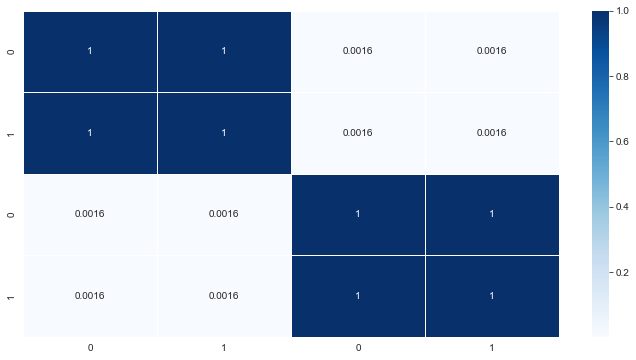

In [164]:
corr = df_test.corr().abs()
plt.figure(figsize=[12, 6])
sns.heatmap(corr, linecolor='white', annot=True, linewidths=1, cmap='Blues')